In [5]:
"""
The results of the training are saved to a results file.
This notbook parses the file(s) to extract the 
training and validation scores for the best model
from each combination of hyper-parameters.
This is very much a scratchpad.
It includes visualisation of the training results and some T-tests.
"""

import pandas as pd
import numpy as np

def parseFile(filename):
    with open(filename,'r') as f:
        all=[]
        for data in f:

            info = data.split('.',14)
            aug=  info[1]
            dropout = float (info[3] +'.' + info[4])
            epochs = int (info[6])
            layers =  info[8]
            lr =  float (info[10] +'.' + info[11])
            model = info[13] 
            the_rest=info[14] 
            results=the_rest.split(',',2)
            best_epoch = results[1]
            metrics=results[2].split('),(',)
            #trainingmetrics=np.array(metrics[0].strip("()"))
            trainingmetrics=np.fromstring(metrics[0].strip("("), dtype=float, sep=',')
           
            #validationgmetrics=np.array(metrics[1].strip("()"))
            validationgmetrics=np.fromstring(metrics[1].strip(")"), dtype=float, sep=',')
            # print (np.fromstring(metrics[0].strip("()"), dtype=float, sep=','))
            # print (np.fromstring(metrics[1].strip("()"), dtype=float, sep=','))
            # break

            line = data.split(',',2)
            modelid=line[0]
            filename=modelid + '.ep.'+best_epoch +'.pt'
            

            all.append([aug,dropout,epochs,layers,lr,model,best_epoch,trainingmetrics,validationgmetrics,modelid,filename])
        return all
    

df = pd.DataFrame(parseFile('.\\data\\result\\FULL_training_results_v3.txt'))

colnames=['aug', 'dropout', 'epochs', 'layers', 'lr', 'model','best_epoch','trainrest', 'valres','modelid','filename'] 
df.columns=colnames
#print(df)
# Now split the metrics
# Would have been easier if I had used json dictionaries from the very outset.
traincolumns = ['ill_f1','ill_f1_std','microf1','micro_std','prec','prec_std', 'recal','recalstd']
valcolumns = ['ill_f1_val','ill_f1_std_val','microf1_val','micro_std_val','prec_val','prec_std_val', 'recal_val','recalstd_val']

# Splitting arrays into separate columns with specified column names
df= pd.concat([df.drop('trainrest', axis=1), df['trainrest'].apply(lambda x: pd.Series(x, index=traincolumns))], axis=1).copy()
df= pd.concat([df.drop('valres', axis=1), df['valres'].apply(lambda x: pd.Series(x, index=valcolumns))], axis=1).copy()

pd.set_option('display.max_colwidth', None)


C:\Users\seven\AppData\Local\Temp\ipykernel_5400\1990552151.py:24: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  validationgmetrics=np.fromstring(metrics[1].strip(")"), dtype=float, sep=',')


In [6]:
score_by_aug=df[['aug','ill_f1_val']].groupby(['aug']).agg(['count','mean', 'std', 'min', 'max'])#.map('{:,.5f}'.format)
score_by_aug

ill_f1_val                                        
                 count      mean       std       min       max
aug                                                           
logarithmic         13  0.491798  0.132477  0.241431  0.646578
none                18  0.358653  0.128654  0.171818  0.552305
permute             18  0.328302  0.154826  0.128870  0.578842
rotate               7  0.525098  0.104911  0.367671  0.634654
split               18  0.756003  0.049915  0.686615  0.829403
splitpc              9  0.763407  0.049830  0.709259  0.830576
splitpc2            28  0.756391  0.059846  0.654569  0.841086
zscore              18  0.321788  0.158478  0.064490  0.563569

In [7]:
score_by_model=df[['model','ill_f1_val']].groupby(['model']).agg(['count','mean', 'std', 'min', 'max'])
score_by_model

ill_f1_val                                        
           count      mean       std       min       max
model                                                   
gat           42  0.546856  0.206207  0.161970  0.757137
gcn           42  0.455640  0.226153  0.117334  0.728233
sage          45  0.617317  0.214732  0.064490  0.841086

In [8]:
scorebyAugModel=df[['aug','model','ill_f1_val']].groupby(['aug','model']).agg(['count','mean', 'std', 'min', 'max'])
scorebyAugModel

ill_f1_val                                        
                       count      mean       std       min       max
aug         model                                                   
logarithmic gat            4  0.529255  0.094531  0.408923  0.615759
            gcn            4  0.335053  0.095426  0.241431  0.446782
            sage           5  0.587230  0.041989  0.553758  0.646578
none        gat            6  0.342294  0.144260  0.171818  0.481666
            gcn            6  0.264871  0.057353  0.194636  0.317122
            sage           6  0.468794  0.082118  0.370444  0.552305
permute     gat            6  0.355611  0.194883  0.161970  0.578842
            gcn            6  0.232281  0.080311  0.128870  0.305083
            sage           6  0.397014  0.139455  0.186848  0.547179
rotate      gat            2  0.583032  0.004517  0.579839  0.586226
            gcn            2  0.380938  0.018763  0.367671  0.394205
            sage           3  0.582582  0.061138  0.515264  0.634654
split       gat            6  0.738269  0.012968  0.723756  0.757137
            gcn            6  0.709538  0.016702  0.686615  0.728233
            sage           6  0.820201  0.010498  0.804123  0.829403
splitpc     gat            3  0.748470  0.006537  0.744176  0.755994
            gcn            3  0.715071  0.005065  0.709259  0.718542
            sage           3  0.826679  0.004434  0.821855  0.830576
splitpc2    gat            9  0.737252  0.014767  0.713095  0.755416
            gcn            9  0.694032  0.016814  0.654569  0.705668
            sage          10  0.829738  0.008187  0.817788  0.841086
zscore      gat            6  0.364521  0.124927  0.215111  0.514383
            gcn            6  0.233856  0.083129  0.117334  0.316572
            sage           6  0.366986  0.221255  0.064490  0.563569

In [9]:
import seaborn as sns
#sns.set_theme(style="whitegrid", palette="pastel")
sns.set_theme(style="whitegrid") # , palette="muted"
sns.despine(left=True)

<Figure size 640x480 with 0 Axes>

C:\Users\seven\AppData\Local\Temp\ipykernel_5400\3929539960.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([  "Split 50/50", "Split 70/30","Split 75/25", "None", "Z-Score","Log X","Permute", "Rotate"],


[]

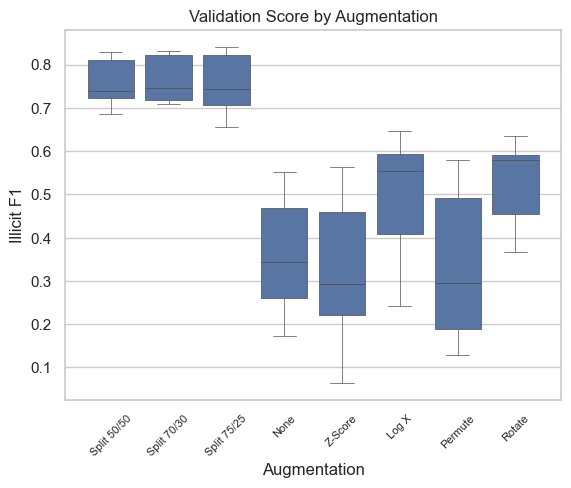

In [10]:
data=df[['aug','ill_f1_val']]

 
ax=sns.boxplot(x="aug",
                y="ill_f1_val"
                , data=data
                , order=["split", "splitpc","splitpc2","none", "zscore","logarithmic","permute", "rotate"]
                , linewidth=0.5
                )


ax.set(xlabel='Augmentation',ylabel='Illicit F1')
ax.set_title('Validation Score by Augmentation')
ax.set_xticklabels([  "Split 50/50", "Split 70/30","Split 75/25", "None", "Z-Score","Log X","Permute", "Rotate"],
                    rotation=45, fontsize=8)
ax.plot()

C:\Users\seven\AppData\Local\Temp\ipykernel_4332\3253473547.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([  "Split 50/50", "Split 70/30","Split 75/25", "None", "Z-Score","Log X","Permute", "Rotate"],


[]

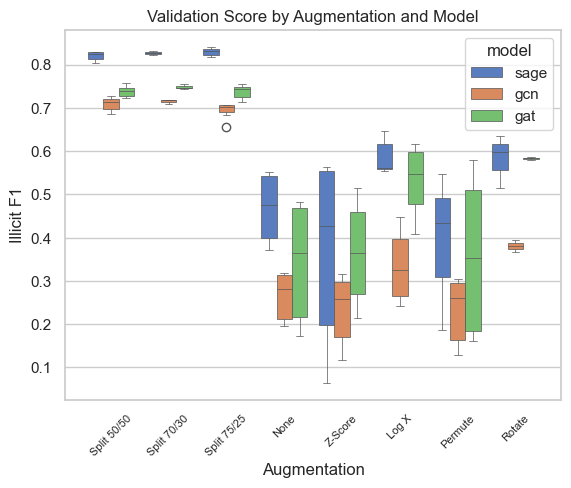

In [8]:
ax=sns.boxplot(x="aug",
                y="ill_f1_val"
                , data=df
                , order=["split", "splitpc","splitpc2","none", "zscore","logarithmic","permute", "rotate"]
                , linewidth=0.5
                , hue='model'
                , palette="muted"
                )


ax.set(xlabel='Augmentation',ylabel='Illicit F1')
ax.set_title('Validation Score by Augmentation and Model')


ax.set_xticklabels([  "Split 50/50", "Split 70/30","Split 75/25", "None", "Z-Score","Log X","Permute", "Rotate"],
                    rotation=45, fontsize=8)
ax.plot()

In [9]:
score_by_layer_epoch=df[['layers','ill_f1_val']].groupby(['layers']).agg(['count','mean','max', 'min','std'])

score_by_layer_epoch


ill_f1_val                                        
            count      mean       max       min       std
layers                                                   
128128         18  0.655059  0.841086  0.394205  0.133688
3232           54  0.443752  0.827309  0.064490  0.252487
6464           57  0.598779  0.832405  0.277507  0.180327

In [10]:
best_model_validaton=df[df.ill_f1_val == df.ill_f1_val.max()]
pd.set_option('display.max_colwidth', None)
best_model_validaton[['modelid','model','aug','ill_f1_val','filename']]

,modelid,model,aug,ill_f1_val,filename
102,aug.splitpc2.dropout.0.5.epochs.150.layers.128128.lr.0.0001.model.sage.,sage,splitpc2,0.841086,aug.splitpc2.dropout.0.5.epochs.150.layers.128128.lr.0.0001.model.sage..ep.10.pt


In [12]:
best_model_accuracy_validaton=df[df.microf1_val == df.microf1_val.max()]
best_model_accuracy_validaton[['modelid','model','aug','microf1_val']]


,modelid,model,aug,microf1_val
102,aug.splitpc2.dropout.0.5.epochs.150.layers.128128.lr.0.0001.model.sage.,sage,splitpc2,0.955102


In [13]:
best_model_train=df[df.ill_f1 == df.ill_f1.max()]
best_model_train[['modelid','model','aug','ill_f1']]

,modelid,model,aug,ill_f1
72,aug.splitpc.dropout.0.5.epochs.150.layers.6464.lr.0.0001.model.sage.,sage,splitpc,0.844563


In [18]:
# underfitting=df[df.ill_f1 < df.ill_f1_val]
# underfitting[['model','aug','ill_f1_val']].groupby(['model','aug']).agg(['count'])

In [15]:
#underfitting
underfitting=df[df.ill_f1 >= df.ill_f1_val]
underfitting[['model','aug','ill_f1','ill_f1_val']].groupby(['model','aug']).agg(['count','mean','max', 'std'])

ill_f1                               ill_f1_val            \
               count      mean       max       std      count      mean   
model aug                                                                 
sage  split        5  0.833106  0.844537  0.008173          5  0.821848   
      splitpc      3  0.843102  0.844563  0.001326          3  0.826679   
      zscore       2  0.212769  0.249079  0.051350          2  0.113395   

                                   
                    max       std  
model aug                          
sage  split    0.829403  0.010836  
      splitpc  0.830576  0.004434  
      zscore   0.162300  0.069162

In [16]:
#perfect
df[df.ill_f1 == df.ill_f1_val]

,aug,dropout,epochs,layers,lr,model,best_epoch,modelid,filename,ill_f1,...,recal,recalstd,ill_f1_val,ill_f1_std_val,microf1_val,micro_std_val,prec_val,prec_std_val,recal_val,recalstd_val


In [17]:
#sort by calidation illicit f1, compare to training f1
small_df=df[['filename','ill_f1_val','ill_f1']]
small_df.sort_values(['ill_f1_val'], ascending=False).head(20)

,filename,ill_f1_val,ill_f1
102,aug.splitpc2.dropout.0.5.epochs.150.layers.128128.lr.0.0001.model.sage..ep.10.pt,0.841086,0.834912
96,aug.splitpc2.dropout.0.5.epochs.150.layers.128128.lr.0.0005.model.sage..ep.10.pt,0.838330,0.835746
99,aug.splitpc2.dropout.0.5.epochs.150.layers.128128.lr.0.001.model.sage..ep.10.pt,0.838165,0.833721
81,aug.splitpc2.dropout.0.5.epochs.100.layers.6464.lr.0.0001.model.sage..ep.20.pt,0.832405,0.827609
75,aug.splitpc2.dropout.0.5.epochs.100.layers.6464.lr.0.0005.model.sage..ep.40.pt,0.832338,0.825492
72,aug.splitpc.dropout.0.5.epochs.150.layers.6464.lr.0.0001.model.sage..ep.60.pt,0.830576,0.844563
2,aug.split.dropout.0.5.epochs.60.layers.6464.lr.0.001.model.sage..ep.10.pt,0.829403,0.844537
24,aug.split.dropout.0.5.epochs.100.layers.6464.lr.0.0001.model.sage..ep.20.pt,0.828790,0.835131
78,aug.splitpc2.dropout.0.5.epochs.100.layers.6464.lr.0.001.model.sage..ep.10.pt,0.828655,0.828413
0,aug.split.dropout.0.5.epochs.60.layers.6464.lr.0.0005.model.sage..ep.10.pt,0.828208,0.834363


In [23]:
from scipy.stats import ttest_ind,shapiro

small_df=df[['aug','ill_f1_val']]

group1 = small_df[small_df['aug']=='splitpc2']
group2 = small_df[small_df['aug']=='split']



print(shapiro(group1['ill_f1_val']))
print(shapiro(group2['ill_f1_val']))


ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)


ShapiroResult(statistic=0.8771564960479736, pvalue=0.00347743253223598)
ShapiroResult(statistic=0.8735164403915405, pvalue=0.020341595634818077)


TtestResult(statistic=0.02377075386270795, pvalue=0.9811509837809795, df=40.92955118308529)

Since the p-value is  greater .05, we don' reject null hypothesis, no evidence to say they are not different

In [24]:
group1 = small_df[small_df['aug']=='splitpc2']
group2 = small_df[small_df['aug']=='splitpc']

print(shapiro(group1['ill_f1_val']))
print(shapiro(group2['ill_f1_val']))

ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

ShapiroResult(statistic=0.8771564960479736, pvalue=0.00347743253223598)
ShapiroResult(statistic=0.8344207406044006, pvalue=0.05004623532295227)


TtestResult(statistic=-0.3491477205678537, pvalue=0.7314998668153678, df=16.111421151455172)

Since the p-value is 
 greater .05, we don't reject null hypothesis, no evidence to say they are not different

In [25]:
group1 = small_df[small_df['aug']=='split']
group2 = small_df[small_df['aug']=='splitpc']

print(shapiro(group1['ill_f1_val']))
print(shapiro(group2['ill_f1_val']))

ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

ShapiroResult(statistic=0.8735164403915405, pvalue=0.020341595634818077)
ShapiroResult(statistic=0.8344207406044006, pvalue=0.05004623532295227)


TtestResult(statistic=-0.36375027039094004, pvalue=0.7207682365672348, df=16.130341270529176)

In [26]:
group1 = small_df[small_df['aug']=='splitpc2']
group2 = small_df[small_df['aug']=='zscore']
ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

TtestResult(statistic=11.135567269136384, pvalue=4.6098339430194814e-10, df=20.153126364797593)

Since the p-value is less than .05, we reject the null hypothesis of the t-test and conclude that there is sufficient evidence to say that the two methods lead to different validation scores.

In [27]:
group1 = small_df[small_df['aug']=='splitpc2']
group2 = small_df[small_df['aug']=='logarithmic']
ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

TtestResult(statistic=6.882562065046396, pvalue=6.666619582165419e-06, df=14.324533407824186)

In [32]:
group1 = small_df[small_df['aug']=='none']
group2 = small_df[small_df['aug']=='permute']
ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

TtestResult(statistic=0.6396734278900799, pvalue=0.5268148634417305, df=32.897261922849715)

In [31]:
group1 = small_df[small_df['aug']=='none']
group2 = small_df[small_df['aug']=='zscore']
ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

TtestResult(statistic=0.7662274189981215, pvalue=0.4490502796360284, df=32.62203876830586)

In [33]:
group1 = small_df[small_df['aug']=='none']
group2 = small_df[small_df['aug']=='rotate']
ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

TtestResult(statistic=-3.3343139570111195, pvalue=0.005161356126533611, df=13.446813413887039)

In [34]:
group1 = small_df[small_df['aug']=='none']
group2 = small_df[small_df['aug']=='logarithmic']
ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

TtestResult(statistic=-2.794824749575981, pvalue=0.009715455223100996, df=25.547880177672194)

In [35]:
group1 = small_df[small_df['aug']=='splitpc2']
group2 = small_df[small_df['aug']=='logarithmic']
ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

TtestResult(statistic=6.882562065046396, pvalue=6.666619582165419e-06, df=14.324533407824186)

Since the p-value is less than .05, we reject the null hypothesis of the t-test and conclude that there is sufficient evidence to say that the two methods lead to different validation scores.

In [42]:
small_df=df[['model','aug','ill_f1_val']]
# Condition for 'model' column to equal 'amodel'
condition1 = small_df['model'] == 'sage'
condition1a = small_df['model'] == 'gat'
condition2 = small_df['aug'].str.startswith('split')

group1 = df[condition1 & condition2]
group2 = df[condition1a & condition2]
# group1 = small_df[small_df['model']=='sage']
# group2 = small_df[small_df['model']=='gat' ]

ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

TtestResult(statistic=23.042412639874044, pvalue=9.546995695361935e-21, df=30.261309629411365)

In [18]:
small_df=df[['model','ill_f1_val']]

group1 = small_df[small_df['model']=='sage']
group2 = small_df[small_df['model']=='gat']

ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

TtestResult(statistic=1.5611653719413772, pvalue=0.12220359823264441, df=84.92710644167947)

Since the p-value is NOT less than .05, we DO NOT reject the null hypothesis of the t-test and conclude that there is NOT sufficient evidence to say that the two methods lead to different validation scores.

In [35]:
small_df=df[['model','ill_f1_val']]

group1 = small_df[small_df['model']=='sage']
group2 = small_df[small_df['model']=='gcn']

ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

TtestResult(statistic=3.414235277332196, pvalue=0.0009880545529720845, df=83.76405545424673)

Since the p-value is less than .05, we reject the null hypothesis of the t-test and conclude that there is sufficient evidence to say that the two methods lead to different validation scores.

In [36]:
small_df=df[['model','ill_f1_val']]

group1 = small_df[small_df['model']=='gat']
group2 = small_df[small_df['model']=='gcn']

ttest_ind(group1['ill_f1_val'], group2['ill_f1_val'], equal_var=False)

TtestResult(statistic=1.9315447134422339, pvalue=0.05689962532836524, df=81.31076115631457)

In [ ]:
Table 5 – Table of results by augmentation type 

In [40]:
from scipy import stats

print(stats.shapiro(group1['ill_f1_val']))
print(stats.shapiro(group2['ill_f1_val']))


ShapiroResult(statistic=0.8497707843780518, pvalue=6.167616811580956e-05)
ShapiroResult(statistic=0.8209224939346313, pvalue=1.2762308870151173e-05)
